In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [2]:
ra = 'pacioos'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

https://pae-paha.pacioos.hawaii.edu/erddap


Pull in the processed inventory

In [18]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2021/data/processed/%s.xlsx' % ra.upper())
df

C:\Users\Mathew.Biddle\programs\Anaconda3\envs\ioos-asset-inventory\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,AWS-HIMB,NaN,Coconut Island Weather Station,NaN,21.433,-157.7863,fixed,2005-01-01,Y,NaN,N,Hawaii Institute of Marine Biology,Academic,Hawaii Institute of Marine Biology,PacIOOS,"air_temperature, rainfall_amount, wind_speed, ...",No WMO ID because asset is land-based.
1,WS- Pier 1,NaN,Pier 1 Honolulu Weather Station,Davis Weather Station,21.2962,-157.8687,fixed,2019-08-14,Y,Hawaii Pilot's Assoc.,N,PacIOOS,Private/Academic,PacIOOS,PacIOOS,"air_temperature, rainfall_amount, wind_speed, ...",No WMO ID because asset is land-based.
2,CDIP 098,51202,"Mokapu Point, Oahu, Hawaii",Datawell Waverider,21.415,-157.6783,wave_buoy,2000-08-09,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
3,CDIP 106,51201,"Waimea Bay, Oahu, Hawaii",Datawell Waverider,21.6705,-158.1172,wave_buoy,2001-12-15,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
4,CDIP 121,52200,"Ipan, Guam",Datawell Waverider,13.3542,144.7883,wave_buoy,2003-07-15,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
5,CDIP 163,52201,"Kalo, Majuro, Marshall Islands",Datawell Waverider,7.0835,171.3918,wave_buoy,2016-05-04,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",Replacement buoy on-site. Waiting on lifted t...
6,CDIP 187,51205,"Pauwela, Maui, Hawaii",Datawell Waverider,21.0182,-156.4252,wave_buoy,2011-12-03,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
7,CDIP 188,51206,"Hilo, Hawaii",Datawell Waverider,19.78,-154.97,wave_buoy,2012-03-04,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
8,CDIP 189,51209,"Aunuu, American Samoa",Datawell Waverider,-14.2645,-170.4934,wave_buoy,2014-10-23,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
9,CDIP 196,52202,"Ritidian Point, Guam",Datawell Waverider,13.6837,144.8121,wave_buoy,2012-10-20,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",Replacement buoy on-site. Waiting on weather ...


Search the ERDDAP server for a single station of interest - more of a test

In [4]:
df_wf = df[df['Station ID'] == 'AWS-HIMB']

# for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
search_for = df_wf['Station ID'].to_string()

search_url = e.get_search_url(search_for=search_for, response="csv")

resp = pd.read_csv(search_url)

resp['Dataset ID']

0    AWS-HIMB
Name: Dataset ID, dtype: object

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`

In [5]:
## TODO add a dictionary for `Station ID` to `Dataset ID` mapping. This will allow us to check if the `Station ID`
# has multiple `Dataset ID` but is collecting obs for the CY.

not_found = []
found = dict()

for station in df['Station ID'].astype(str):
    
    try:
        search_url = e.get_search_url(search_for=station, response="csv")
        resp = pd.read_csv(search_url)
        print("Found \"%s\": %s" % (station,resp['Dataset ID'].values.tolist()))
        
        found[station] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        not_found.append(station)
#        pass
        print('no dataset matching \"%s\"' % station)
        station_long_name = df.loc[df['Station ID'] == station,'Station Long Name'].values.tolist()[0]
        
        try:
            print('searching \"station long name\" = \"%s\"' % station_long_name)
            search_url = e.get_search_url(search_for=station_long_name, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (station_long_name,resp['Dataset ID'].values.tolist()))
            
            found[station] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:
            print("No dice...")
            not_found.append(station)
        
    print("\n")

Found "AWS-HIMB": ['AWS-HIMB']


Found "WS- Pier 1": ['AWS-HNLPier1']


no dataset matching "CDIP 098"
searching "station long name" = "Mokapu Point, Oahu, Hawaii"
No dice...


no dataset matching "CDIP 106"
searching "station long name" = "Waimea Bay, Oahu, Hawaii"
Found "Waimea Bay, Oahu, Hawaii": ['BEACHCAM-003', 'BEACHCAM-004']


no dataset matching "CDIP 121"
searching "station long name" = "Ipan, Guam"
No dice...


no dataset matching "CDIP 163"
searching "station long name" = "Kalo, Majuro, Marshall Islands"
No dice...


no dataset matching "CDIP 187"
searching "station long name" = "Pauwela, Maui, Hawaii"
No dice...


no dataset matching "CDIP 188"
searching "station long name" = "Hilo, Hawaii"
Found "Hilo, Hawaii": ['WQB-04', 'WQB-05']


no dataset matching "CDIP 189"
searching "station long name" = "Aunuu, American Samoa"
No dice...


no dataset matching "CDIP 196"
searching "station long name" = "Ritidian Point, Guam"
No dice...


no dataset matching "CDIP 197"
searching "st

Print the stations that we couldn't find.

In [6]:
df[df['Station ID'].isin(not_found)]

,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
2,CDIP 098,51202,"Mokapu Point, Oahu, Hawaii",Datawell Waverider,21.415,-157.6783,wave_buoy,2000-08-09,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
3,CDIP 106,51201,"Waimea Bay, Oahu, Hawaii",Datawell Waverider,21.6705,-158.1172,wave_buoy,2001-12-15,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
4,CDIP 121,52200,"Ipan, Guam",Datawell Waverider,13.3542,144.7883,wave_buoy,2003-07-15,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
5,CDIP 163,52201,"Kalo, Majuro, Marshall Islands",Datawell Waverider,7.0835,171.3918,wave_buoy,2016-05-04,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",Replacement buoy on-site. Waiting on lifted t...
6,CDIP 187,51205,"Pauwela, Maui, Hawaii",Datawell Waverider,21.0182,-156.4252,wave_buoy,2011-12-03,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
7,CDIP 188,51206,"Hilo, Hawaii",Datawell Waverider,19.78,-154.97,wave_buoy,2012-03-04,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
8,CDIP 189,51209,"Aunuu, American Samoa",Datawell Waverider,-14.2645,-170.4934,wave_buoy,2014-10-23,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
9,CDIP 196,52202,"Ritidian Point, Guam",Datawell Waverider,13.6837,144.8121,wave_buoy,2012-10-20,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",Replacement buoy on-site. Waiting on weather ...
10,CDIP 197,52211,"Tanapag, Saipan, CNMI",Datawell Waverider,15.2685,145.6623,wave_buoy,2012-10-24,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",Replacement buoy on-site. Waiting on weather ...
11,CDIP 198,51207,"Kaneohe Bay, Oahu, Hawaii",Datawell Waverider,21.4775,-157.7526,wave_buoy,2012-10-16,Y,PacIOOS,Yp,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN


In [7]:
found

{'AWS-HIMB': {'Dataset ID': ['AWS-HIMB']},
 'WS- Pier 1': {'Dataset ID': ['AWS-HNLPier1']},
 'CDIP 106': {'Dataset ID': ['BEACHCAM-003', 'BEACHCAM-004']},
 'CDIP 188': {'Dataset ID': ['WQB-04', 'WQB-05']},
 'CDIP 198': {'Dataset ID': ['AWS-HIMB']},
 'NS02': {'Dataset ID': ['NSS-002']},
 'NS03': {'Dataset ID': ['NSS-003']},
 'NS04': {'Dataset ID': ['NSS-004']},
 'NS05': {'Dataset ID': ['NSS-005']},
 'NS06': {'Dataset ID': ['NSS-006']},
 'NS07': {'Dataset ID': ['NSS-007']},
 'NS10': {'Dataset ID': ['NSS-010']},
 'NS12': {'Dataset ID': ['NSS-012']},
 'NS17': {'Dataset ID': ['NSS-015']},
 'nan': {'Dataset ID': ['aco_adcp_temp',
   'aco_adcp_vel',
   'aco_acoustic',
   'cwb_water_quality',
   'maui_water_quality',
   'hui_water_quality',
   'AWS-CRRF',
   'sg523_4',
   'sg114_3',
   'sg139_2',
   'sg139_1',
   'sg114_4',
   'sg139_3',
   'sg523_3',
   'sg139_8',
   'sg139_6',
   'sg139_9',
   'sg523_1',
   'sg139_7',
   'himb_shark_profiles_176027',
   'himb_shark_profiles_171406',
   'himb

Check if the dataset has coverage for CY 2021

In [8]:
valid_datasets = []

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "2021-01-01"
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "2021-01-01"
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

non_2021_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for 2021:\n%s' % non_2021_datasets)

Datasets without coverage for 2021:
{'CDIP 106'}


Show me the inventory metadata about the invalid stations:

In [9]:
bad_stations = df.loc[(df['Station ID'].isin(non_2021_datasets)) | df['Station ID'].isin(not_found)]

bad_stations

,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
2,CDIP 098,51202,"Mokapu Point, Oahu, Hawaii",Datawell Waverider,21.415,-157.6783,wave_buoy,2000-08-09,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
3,CDIP 106,51201,"Waimea Bay, Oahu, Hawaii",Datawell Waverider,21.6705,-158.1172,wave_buoy,2001-12-15,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
4,CDIP 121,52200,"Ipan, Guam",Datawell Waverider,13.3542,144.7883,wave_buoy,2003-07-15,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
5,CDIP 163,52201,"Kalo, Majuro, Marshall Islands",Datawell Waverider,7.0835,171.3918,wave_buoy,2016-05-04,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",Replacement buoy on-site. Waiting on lifted t...
6,CDIP 187,51205,"Pauwela, Maui, Hawaii",Datawell Waverider,21.0182,-156.4252,wave_buoy,2011-12-03,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
7,CDIP 188,51206,"Hilo, Hawaii",Datawell Waverider,19.78,-154.97,wave_buoy,2012-03-04,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
8,CDIP 189,51209,"Aunuu, American Samoa",Datawell Waverider,-14.2645,-170.4934,wave_buoy,2014-10-23,Y,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN
9,CDIP 196,52202,"Ritidian Point, Guam",Datawell Waverider,13.6837,144.8121,wave_buoy,2012-10-20,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",Replacement buoy on-site. Waiting on weather ...
10,CDIP 197,52211,"Tanapag, Saipan, CNMI",Datawell Waverider,15.2685,145.6623,wave_buoy,2012-10-24,O,PacIOOS,Yf,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",Replacement buoy on-site. Waiting on weather ...
11,CDIP 198,51207,"Kaneohe Bay, Oahu, Hawaii",Datawell Waverider,21.4775,-157.7526,wave_buoy,2012-10-16,Y,PacIOOS,Yp,PacIOOS,Academic,PacIOOS,CDIP,"sea_surface_wave_significant_height, sea_surfa...",NaN


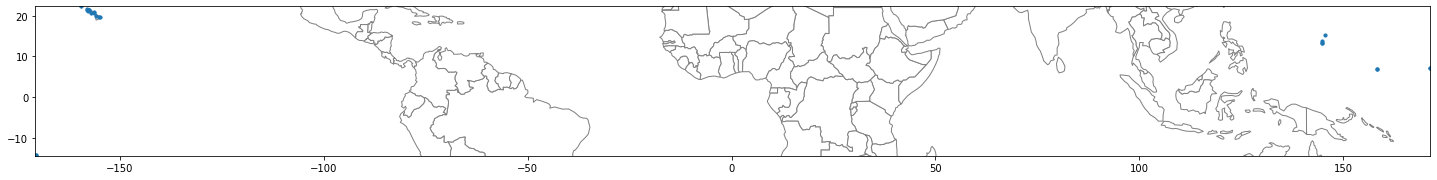

In [19]:
import geopandas
import matplotlib.pyplot as plt


df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         #column='RA', 
         categorical=True, 
         markersize=10, 
         legend=True,
         k=11,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()

In [20]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.explore()

In [21]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,geometry
